ML Project Car Price Prediction

1. Import necessary libariries


In [5]:
!pip install category_encoders
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno
from sklearn.utils import shuffle
from category_encoders import TargetEncoder, OneHotEncoder
import warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.5 MB/s eta 0:00:00


2. Understanding the data

In [7]:
data = pd.read_csv('/content/data.csv')

shape is used to represent the number of rows and columns in the dataset

In [8]:
data.shape

(11914, 16)

head() method is used to return a specific number of rows and columns

In [9]:
data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


info() used to represent the basic info about the dataset

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

3. Exploratory Data Analysis

nunique() represent the number of unique values

In [29]:
data.nunique()

,0
Make,48
Model,915
Year,28
Engine Fuel Type,10
Engine HP,356
Engine Cylinders,9
Transmission Type,5
Driven_Wheels,4
Number of Doors,3
Market Category,71


*Missingo*

it is used for finding the missing values in the dataset

<Axes: >

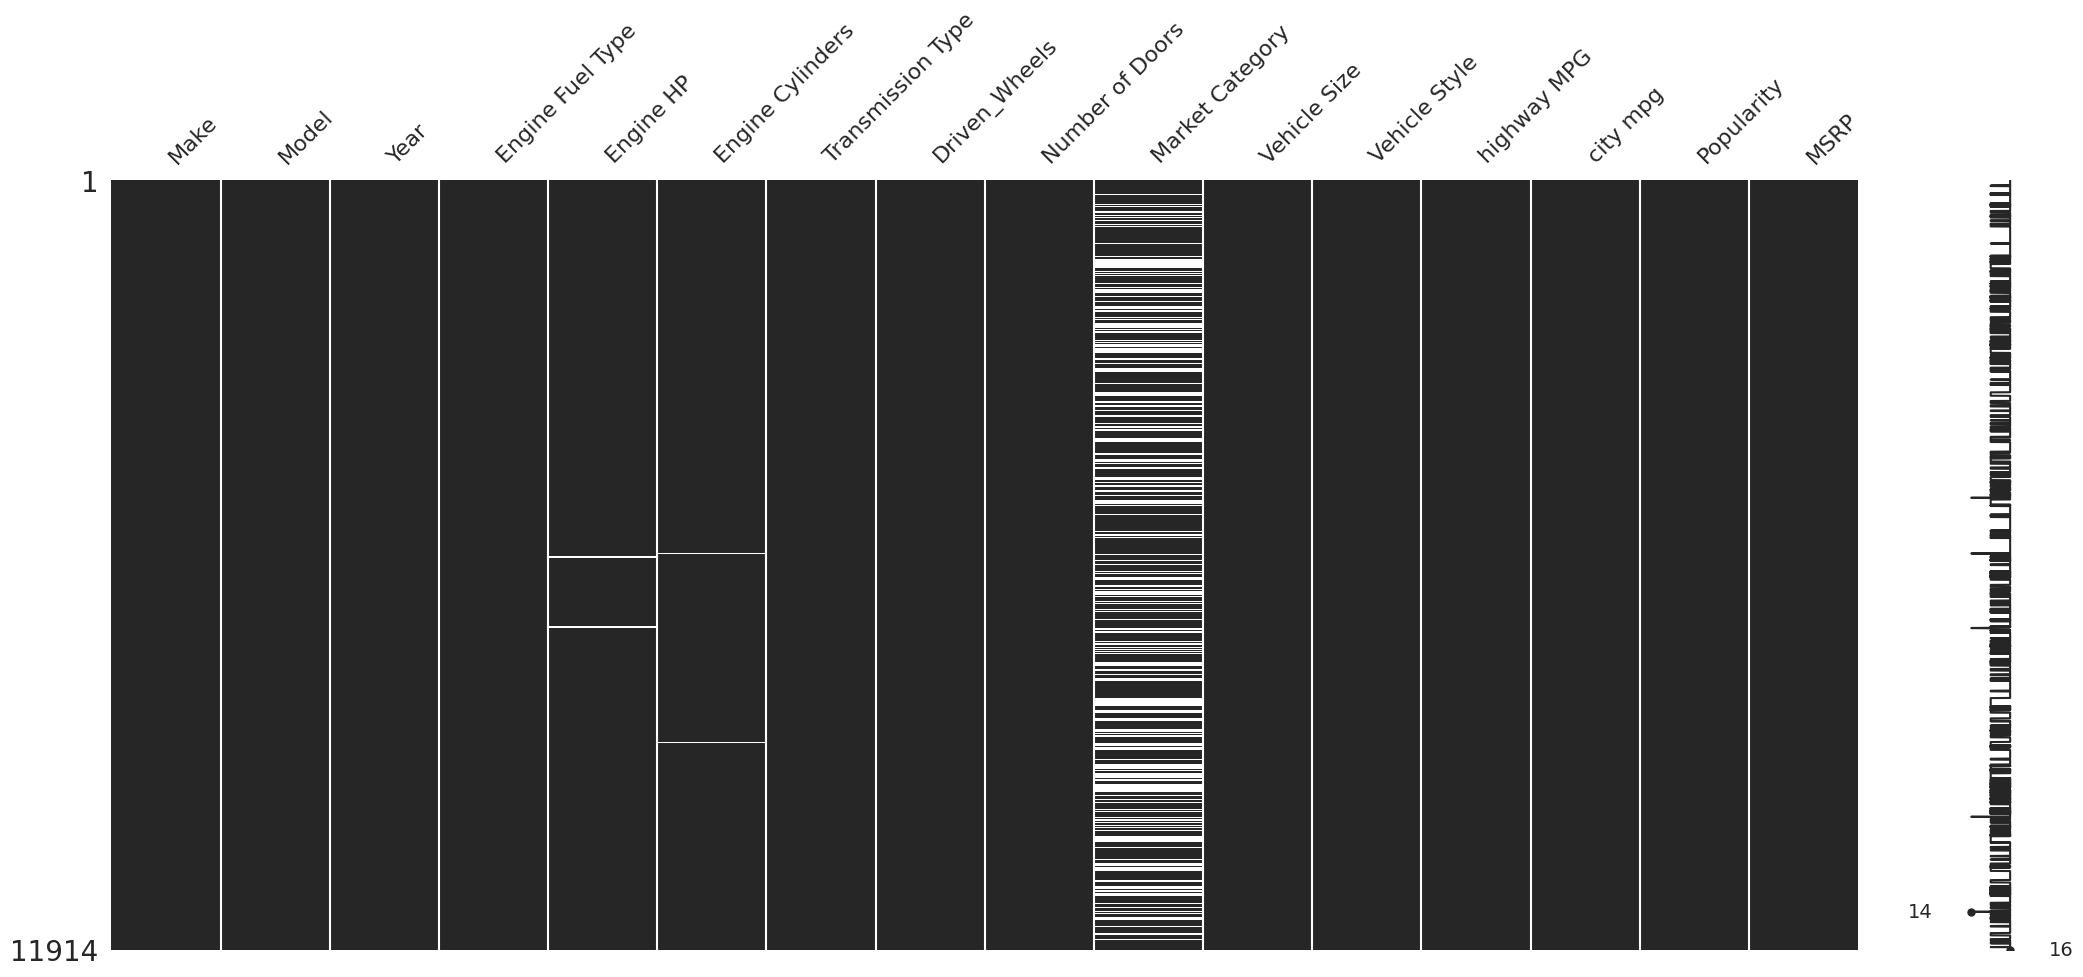

In [14]:
msno.matrix(data, color = (0.15, 0.15, 0.15))

*Countplot*

it is used to represent the relationship between two variables and the distribution of each one

Countplot of make

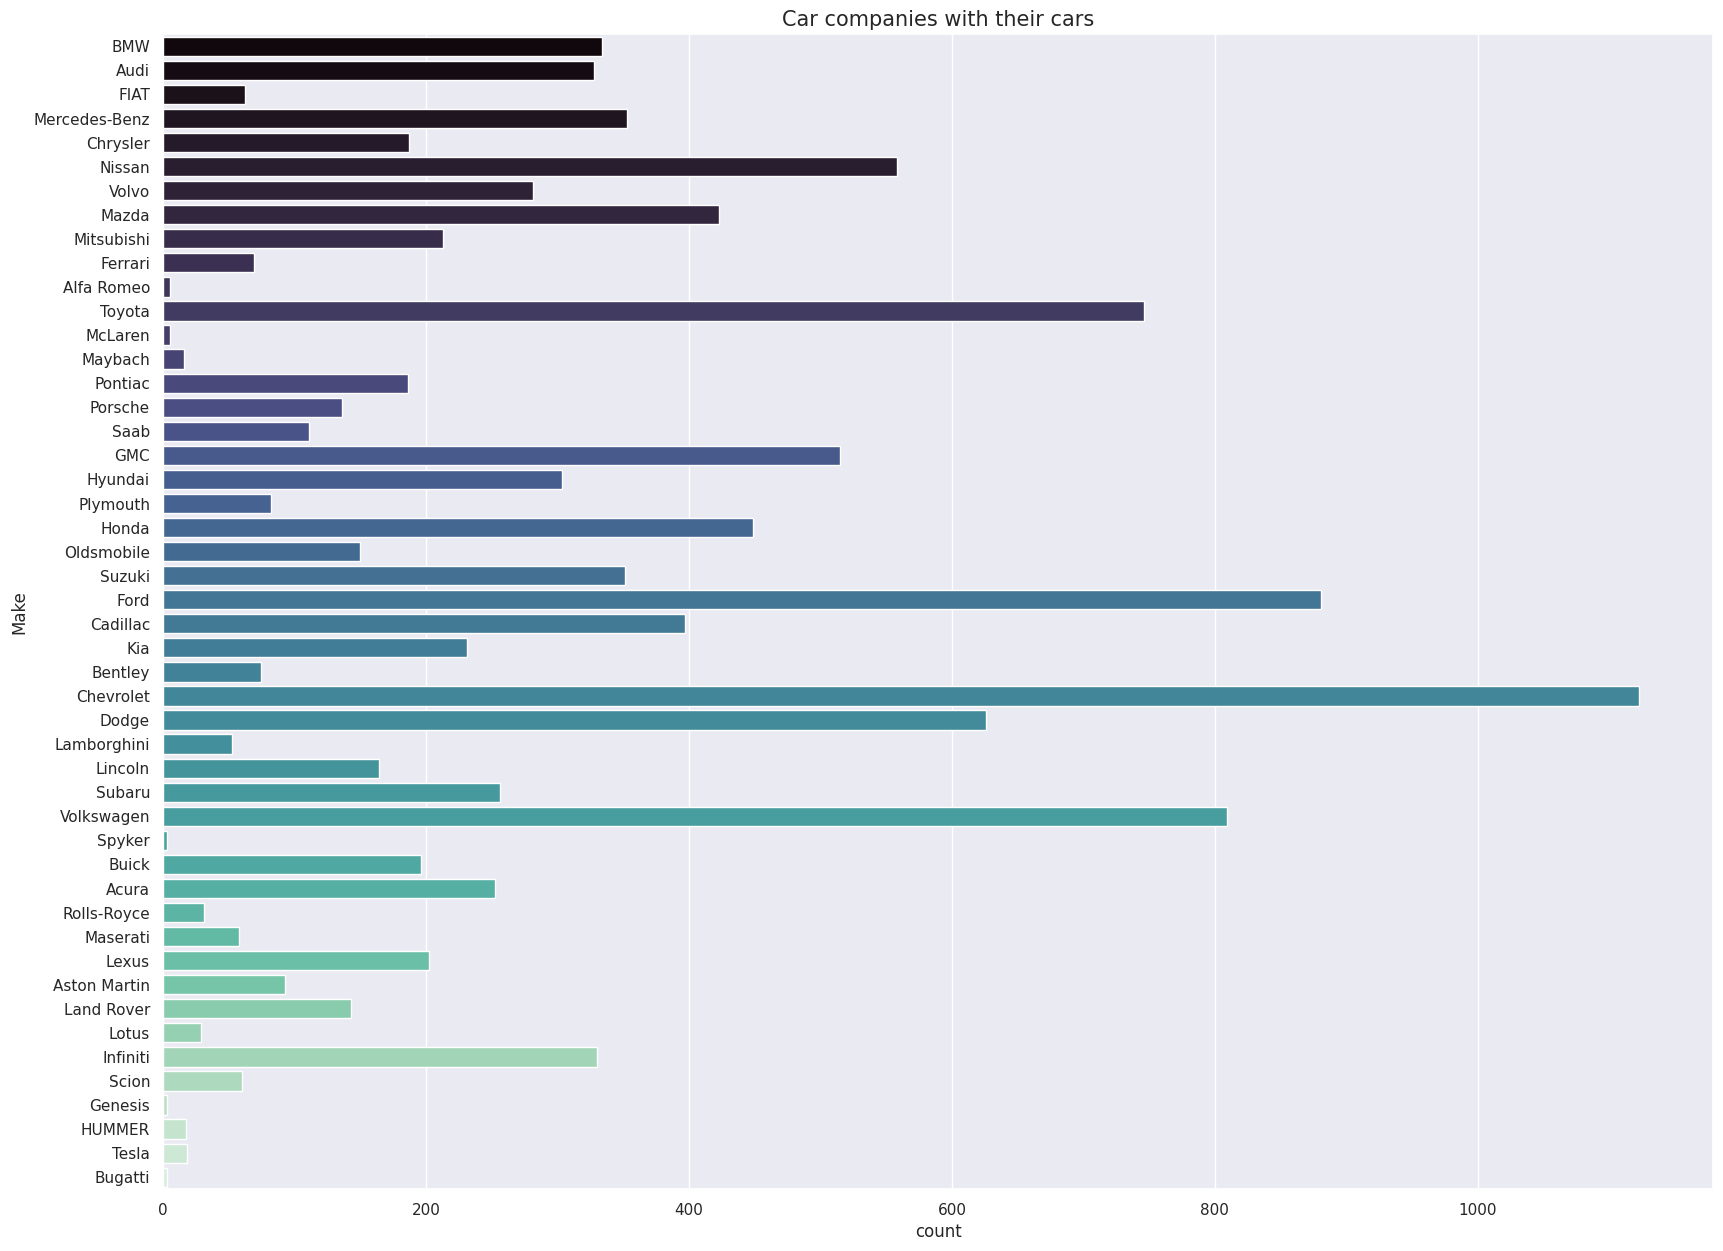

In [19]:
plt.figure(figsize = (20, 15))
sns.countplot(y = data.Make, palette="mako")
plt.title("Car companies with their cars", fontsize = 15)
plt.show()

Countplot of fuel type

<Axes: xlabel='count', ylabel='Engine Fuel Type'>

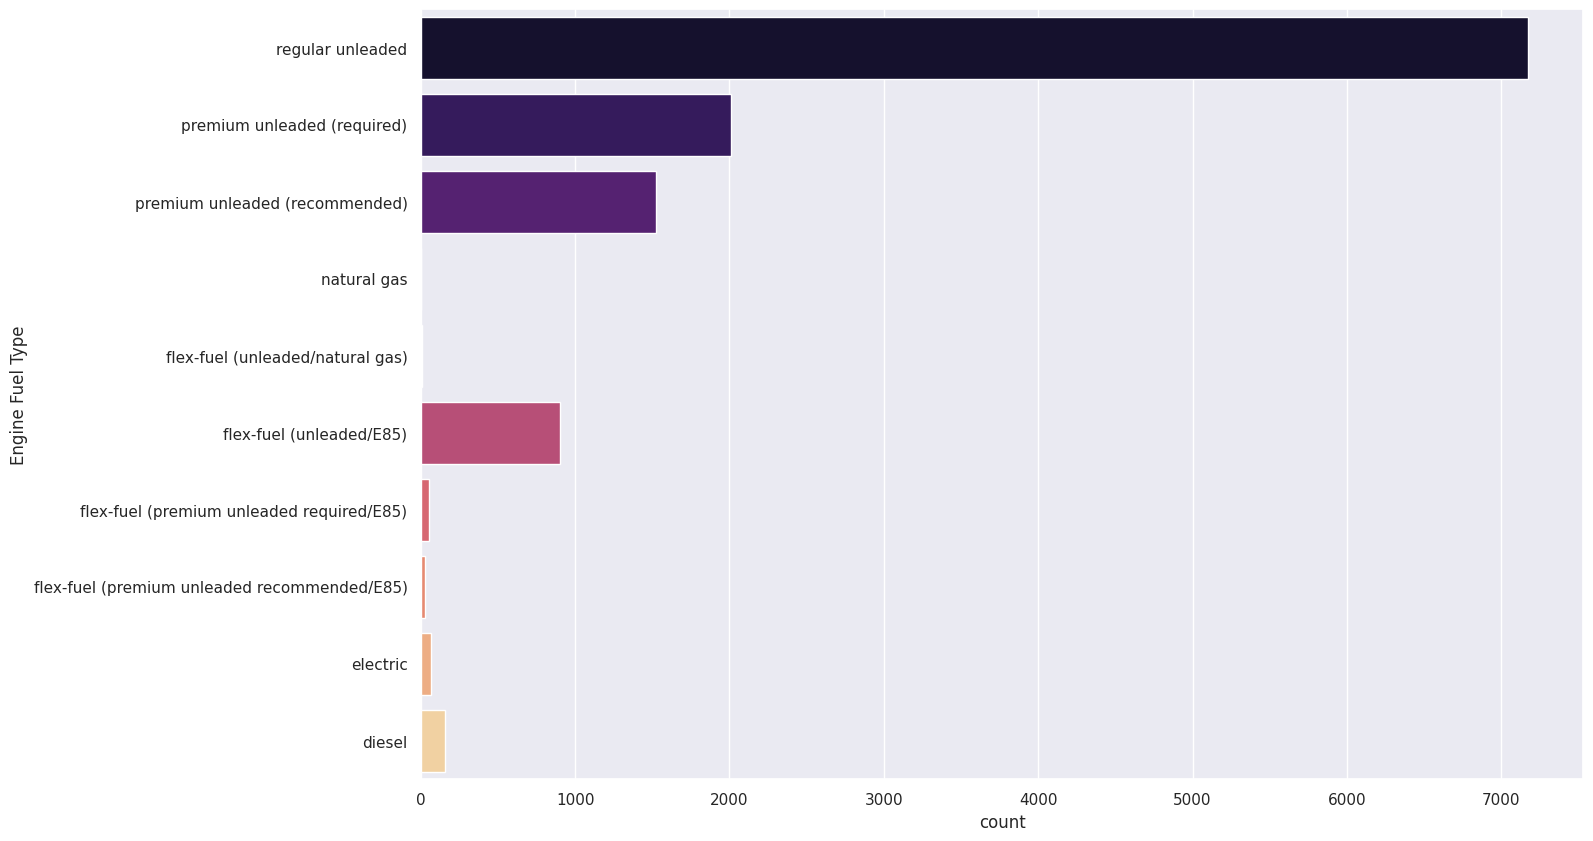

In [24]:
plt.figure(figsize = (15, 10))
sns.countplot(y = data['Engine Fuel Type'].sort_values(ascending = False), palette = 'magma')

Countplot of transmission

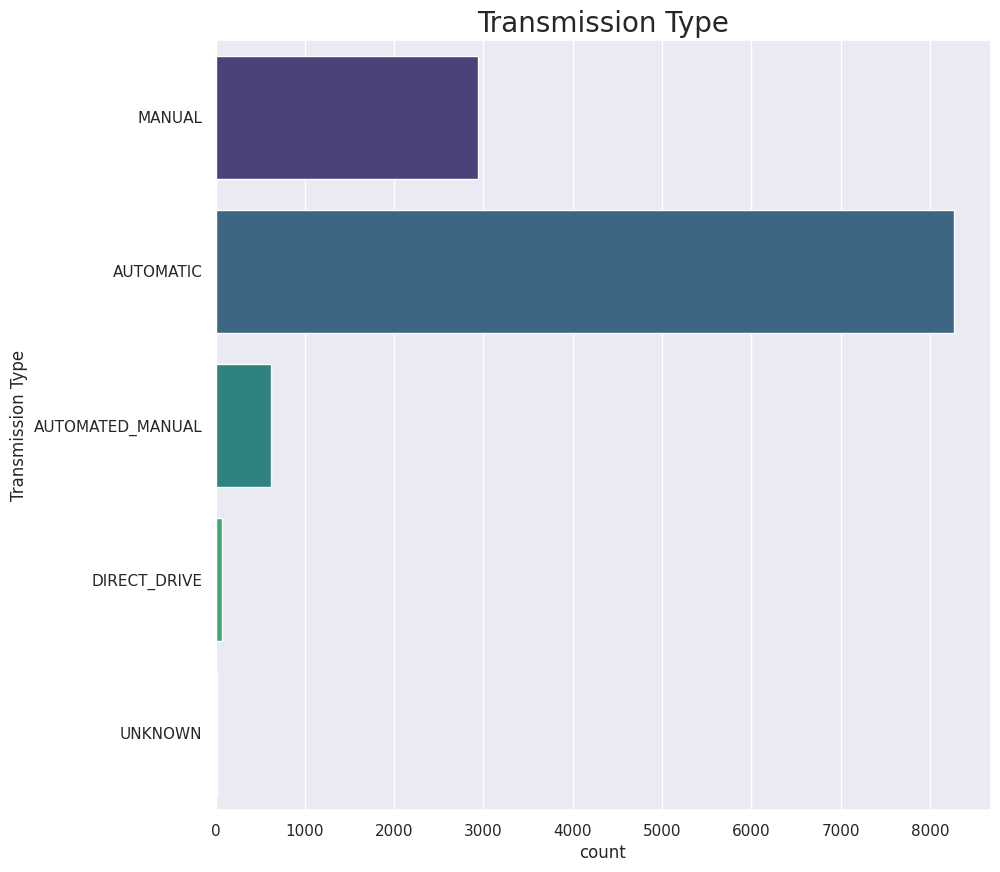

In [26]:
plt.figure(figsize = (10, 10))
sns.countplot(data['Transmission Type'], palette = 'viridis')
plt.title("Transmission Type", fontsize = 20)
plt.show()

Countplot of vechicle size

<Axes: xlabel='Vehicle Size', ylabel='count'>

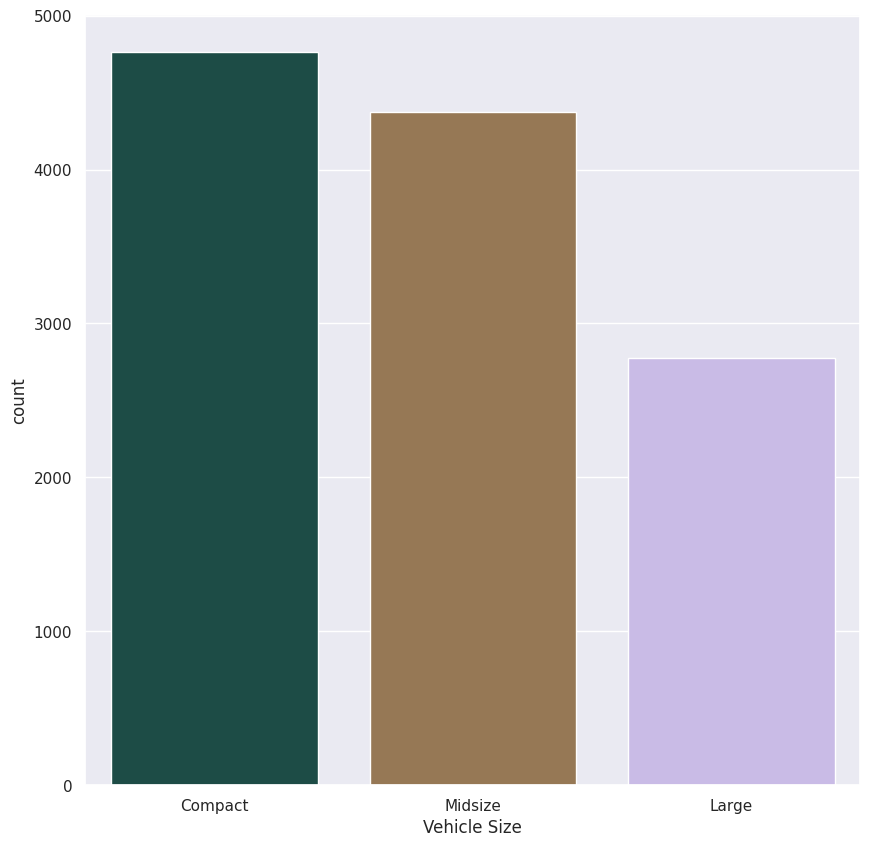

In [28]:
plt.figure(figsize = (10, 10))
sns.countplot(x = 'Vehicle Size', data = data, palette = 'cubehelix')

*Correlation*

it is used to represent the two variables are linearly related upto which extent

Correlation Heatmap between all the variables

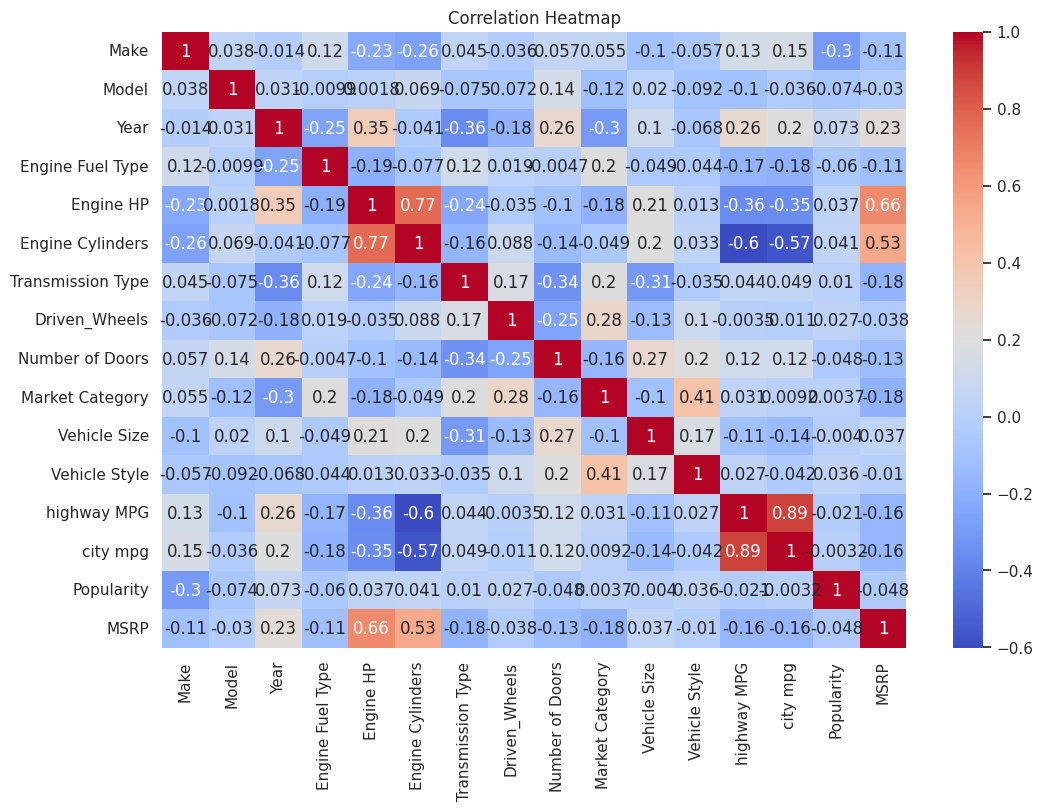

In [34]:
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

4. Implementing the ML models

comments explains the steps

In [33]:
# Install CatBoost and XGBoost if not already installed
!pip install catboost xgboost

# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
dataset_path = input("Enter the full path to the dataset file (e.g., data.csv): ")

try:
    df = pd.read_csv(dataset_path)
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The file path entered is invalid. Please check and try again.")
    exit()

# Handle missing values - drop rows with missing target and impute others
df = df.dropna(subset=['MSRP'])
df.fillna(df.median(numeric_only=True), inplace=True)

# Encode categorical features using LabelEncoder
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Features and target
X = df.drop(columns=['MSRP'])
y = df['MSRP']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "KNeighbors Regressor": KNeighborsRegressor(n_neighbors=5),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42),
    "CatBoost": CatBoostRegressor(verbose=0, iterations=100),
    "LightGBM": LGBMRegressor(n_estimators=100, random_state=42),
    "Extra Trees": ExtraTreesRegressor(n_estimators=100, random_state=42)
}

# Train, evaluate, and collect results
results = {"Model": [], "MAE": [], "MSE": []}
predictions = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict

    # Evaluate
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)

    # Store results
    results["Model"].append(name)
    results["MAE"].append(mae)
    results["MSE"].append(mse)
    predictions[name] = y_pred

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df.sort_values(by="MAE", inplace=True)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.7 MB/s eta 0:00:00
Enter the full path to the dataset file (e.g., data.csv): /content/data.csv
Dataset loaded successfully.
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001449 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 857
[LightGBM] [Info] Number of data points in the train set: 9531, number of used features: 15
[LightGBM] [Info] Start training from score 40804.795614


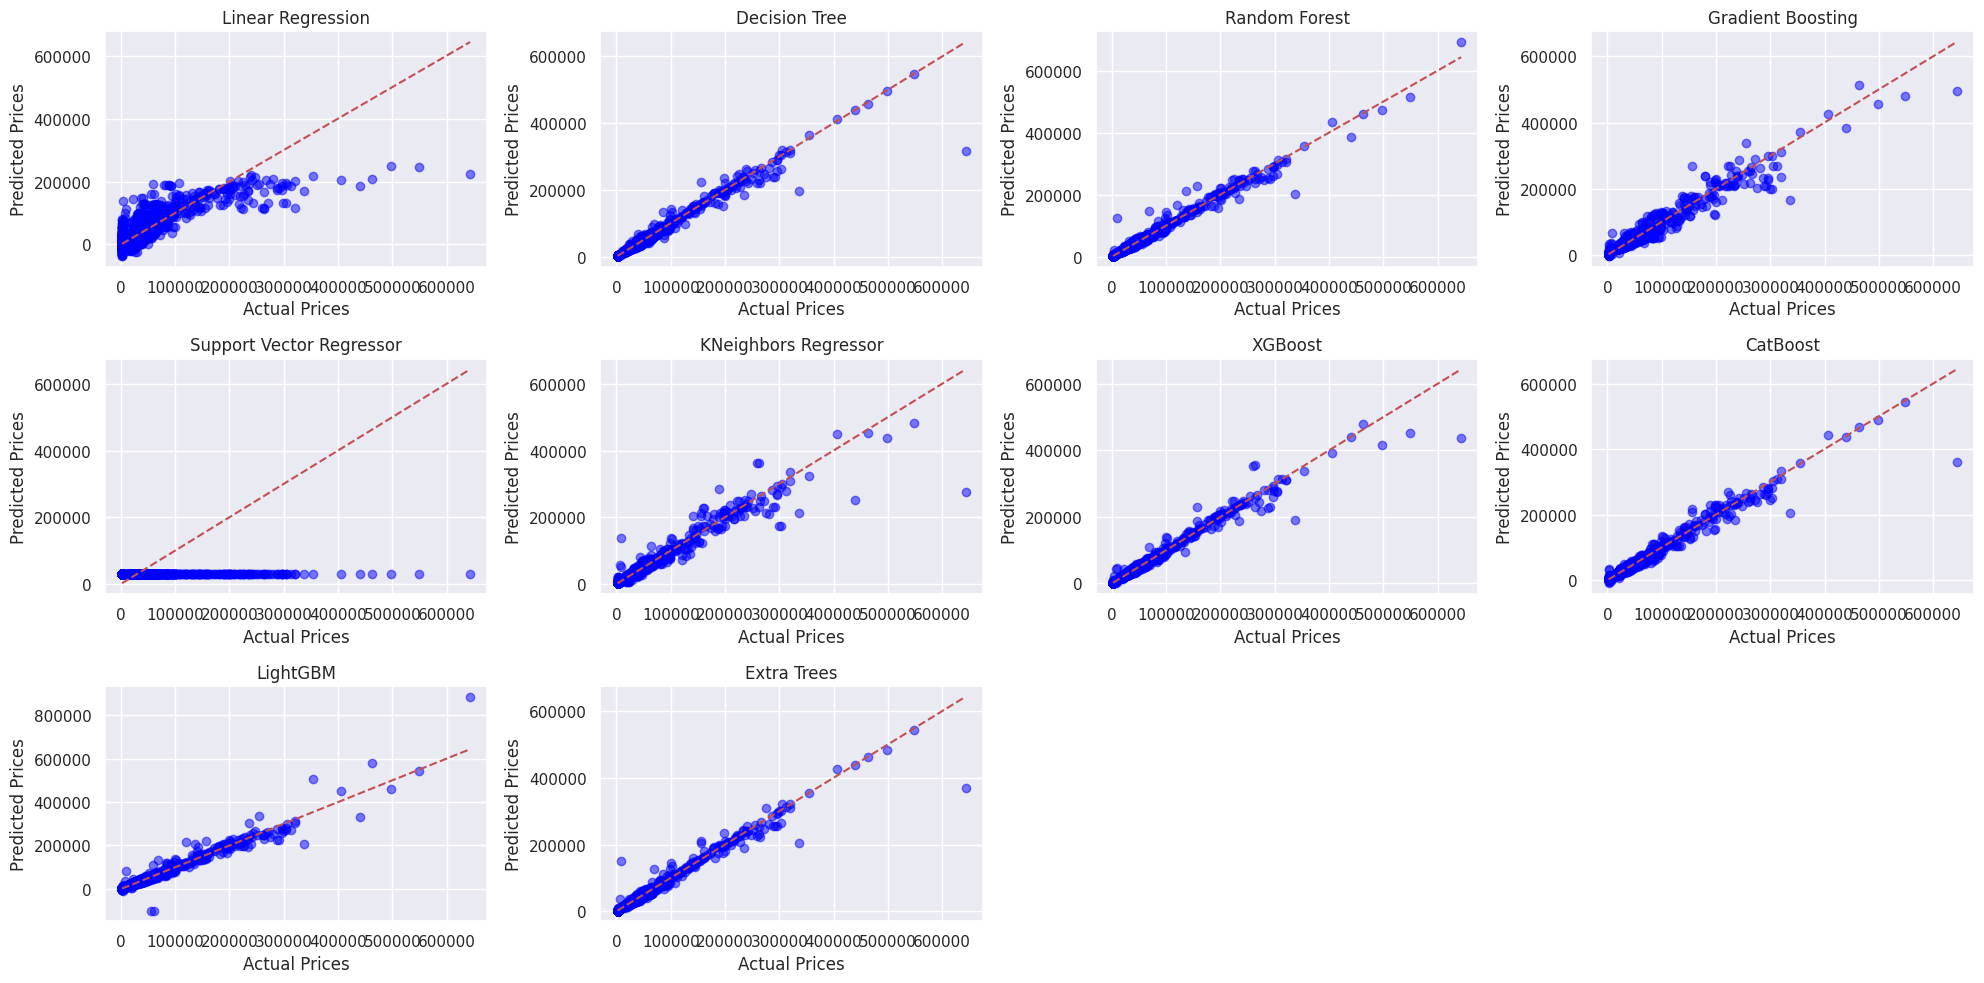

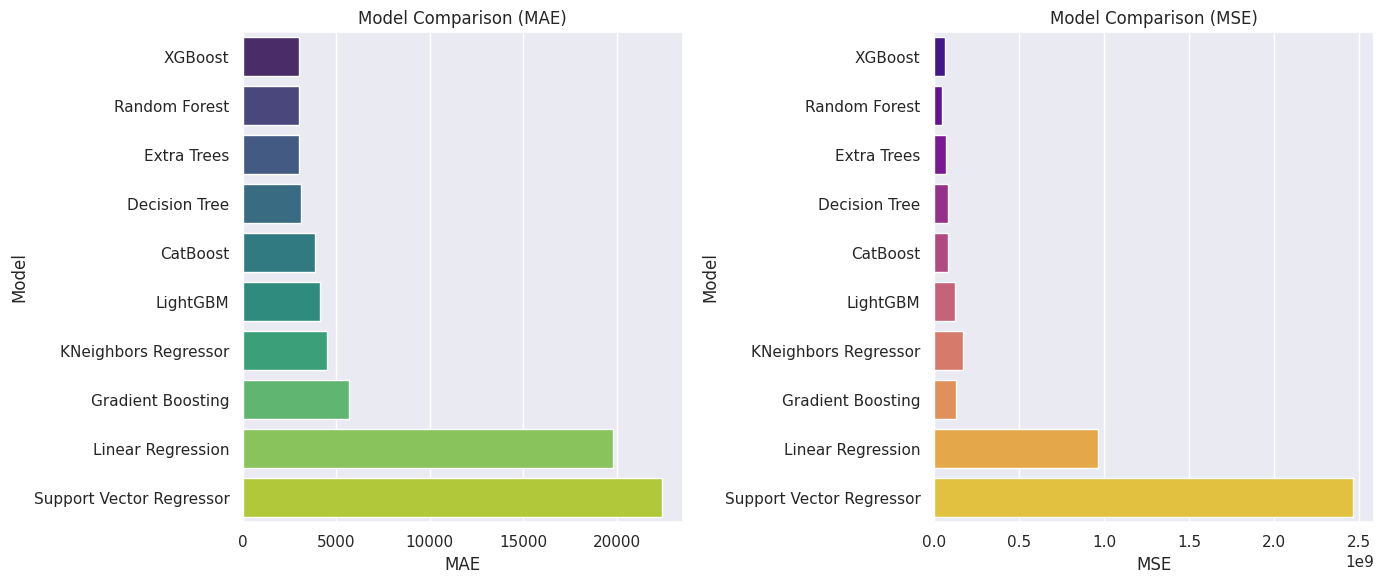

Model evaluation results:
                      Model           MAE           MSE
6                   XGBoost   2992.228271  6.827000e+07
2             Random Forest   3001.863466  4.684772e+07
9               Extra Trees   3017.133265  7.469875e+07
1             Decision Tree   3094.191041  8.464520e+07
7                  CatBoost   3865.187516  8.221208e+07
8                  LightGBM   4113.338734  1.265679e+08
5      KNeighbors Regressor   4487.549559  1.695859e+08
3         Gradient Boosting   5685.590510  1.329170e+08
0         Linear Regression  19791.021832  9.679340e+08
4  Support Vector Regressor  22405.802443  2.463016e+09


In [35]:
# Visualize predictions for each model
plt.figure(figsize=(20, 10))
for i, (name, y_pred) in enumerate(predictions.items()):
    plt.subplot(3, 4, i + 1)
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f"{name}")
    plt.xlabel("Actual Prices")
    plt.ylabel("Predicted Prices")

plt.tight_layout()
plt.show()

# Final Bar Plot: Comparing MAE and MSE
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for MAE
sns.barplot(x="MAE", y="Model", data=results_df, palette="viridis", ax=axes[0])
axes[0].set_title("Model Comparison (MAE)")

# Bar plot for MSE
sns.barplot(x="MSE", y="Model", data=results_df, palette="plasma", ax=axes[1])
axes[1].set_title("Model Comparison (MSE)")

plt.tight_layout()
plt.show()

print("Model evaluation results:")
print(results_df)